<a href="https://colab.research.google.com/github/skdding3/CSAI_assignment/blob/main/n211a_sunki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum() #missing value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
corr = df.corr() #correlation 피어슨 상관계수를 바로 볼수있음.

corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [5]:
corr_descend=corr.sort_values(by=['price'],axis=0,ascending=False)  #특성들과 타겟(Price)과의 상관계수 높은값부터 (ascending false는 descending)

corr_descend['price']  #sqft_living이 제일 계수가 제일 높음

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

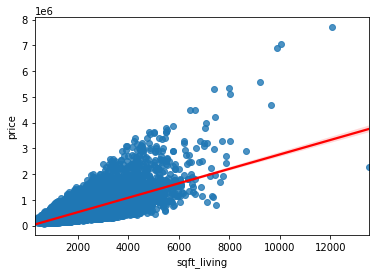

In [14]:
import seaborn as sns

sns.regplot(data=df,y='price',x='sqft_living',line_kws={'color': 'red'});  #price와 sqft_living 상관을 시각화

### 2)

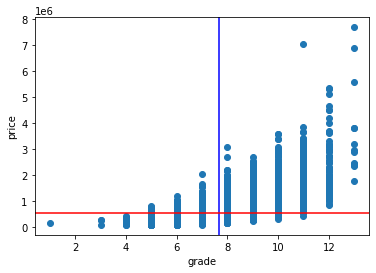

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['grade'],df['price'])
plt.xlabel('grade')
plt.ylabel('price')

x =df['grade'].mean()
y =df['price'].mean() # predict 기준모델 값
plt.axvline(x, color='blue')
plt.axhline(y, color='red') #Base line model
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error

error = y - df['price']
mae = error.abs().mean() # mae

mae

233941.7242725122

### 3)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #예측모델 인스턴스
feature = ['grade']        #x 특성 = grade
target = ['price']         #y 타겟 벡터 = price
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)  #모델을 학습 (fit method)

X_test = [[6]]               #grade값이 6인 경우 predict matrix
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 grade를 가지는 주택의 예상 가격은 $194700 입니다.


### 4) 

In [9]:
model.coef_ #계수(coefficient)

array([[208457.56245838]])

In [10]:
def grade_predict(grade):
    y_pred = model.predict([[grade]])
    pred = f"{int(grade)} grade를 가지는 주택 가격 예측: ${int(y_pred[0])} (1 grade마다 증가하는 가격: ${int(model.coef_[0])})"

    return pred

print(grade_predict(6))  #grade가 1씩 증가할때마다 모델의 coefficient $208457 씩 가격증가

6 grade를 가지는 주택 가격 예측: $194700 (1 grade마다 증가하는 가격: $208457)


### 5) 

In [11]:
model2 = LinearRegression() #예측모델 인스턴스
feature2 = ['sqft_living']  #x 특성 = sqft_living
target2 = ['price']         #y 타겟 벡터 = price
X_train2 = df[feature2]
y_train2 = df[target2]

model2.fit(X_train2, y_train2)   #모델을 학습 (fit method)

X_test2 = [[x] for x in df['sqft_living']]  #predict
y_pred2 = model2.predict(X_test2)

model2.coef_  #계수(coefficient)

array([[280.6235679]])

In [12]:
model2.intercept_ #절편(intercept)

array([-43580.74309447])

In [13]:
mae = mean_absolute_error(df['grade'], df['price'])        
print(mae)

mae2 = mean_absolute_error(df['sqft_living'], df['price'])  
print(mae2)

540080.4848933512
538008.2420302596


두 에러값을 비교해 본 결과 sqft_living에 학습시켰을때 에러값이 더 적으므로 정확도는 두번째 모델이 더 정확하다.

6)
단순선형회귀모델을 만들기 위해 다음과 같은 항목을 고려해보아야한다.
-  모형의 선형성(linearity)
- 오차의 정규성(normality), 등분산성(homoscedasticity), 독립성(independence)
- 이상치(outlier)의 존재
- 영향관찰치(influential observation)의 존재

위 항목들을 확인하기 위해서 산점도와 박스플롯같은 그래프로 확인할수 있겠다.

이를 통해서 다음과 같은 가정을 세워볼수 있겠는데,
- 독립변수와 종속변수는 선형관계이며, 독립변수간에서는 서로 선형적 독립.
- 오차항은 평균이 0이고 분산이 일정한 정규 분포를 가져야 함.
- 오차항은 자기 상관성이 없음.
- 이상치(outlier)가 없음.

이러한 가정을 통하여 적합한 단순선형회귀모델을 만들수있다.

7)
최소 제곱법은 잔차의 제곱의 합을 최소로 만드는 회귀선을 찾는 방법이다.
(표본으로부터 얻은 '적합회귀선'과 실제 자료의 차이를 '잔차(residual)'라고 한다.)
특정 데이터의 추세선을 그렸을때 

실제 데이터 y값과 추세선 y값 그 차이의 제곱의 합을 최소로 하는 방법이다 (이때 x값은 독립변수 이며 오차가 없다.즉 기준축이 된다.)


즉 이러한 최소 제곱법이 최적의 선형 회귀식(Linear Regression)을 도출할수있다.

OLS와 같이 사용 하는 방식으로 TLS(Total Least Square , 직교회귀)도 있는데 TLS는 x,y값 모두 독립변수일때 유효하기도 한다.(OLS와 다르게 기준축이 없어 x랑 y값 모두 오차를 포함할수 있음.)